In [2]:
import numpy as np
import imp
import methods
import besttest
import matplotlib.pyplot as plt

In [3]:
imp.reload(besttest)
N = 1250
M = 500
n=200
spikes = np.array([45])
spikes = np.append(spikes, 5.0*np.ones(shape=249))
#U, S, V = besttest.spikedWishart(N, M, spikes)
n = 500
ss = np.zeros(shape=(n, M))
vv = np.zeros(n)
for i in range(n):
    U, S, V = besttest.spikedWishart(N, M, spikes)
    ss[i, :] = S
    vv[i] = V[0, 0]

In [8]:
imp.reload(methods)
sp = methods.spectrum(S, N, M, 1)

In [9]:
sp.fit(500,100, 2)

In [11]:
p = sp.appr_esd.dens.p
l = sp.appr_esd.dens.l
r = sp.appr_esd.dens.r

In [12]:
x = np.arange(100)/100*(r-l)+l

In [13]:
y = p(x)

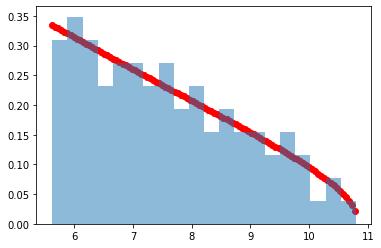

In [17]:
plt.scatter(x, y, color='red')
ev = S[1:101]
plt.hist(ev, bins=20, density=True, alpha=0.5)
plt.show()

In [81]:
imp.reload(methods)
spp = methods.spectrum(S, N, M)

In [82]:
spp.auto_sq_fit(200,50,2)

Number of outliers found:  1
Index of eigenvalue that failed test:  1
Reason: Eigenvalue within threshold sample stds of spectral edge


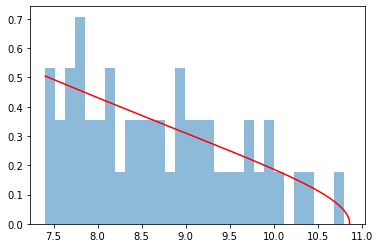

In [83]:
spp.plot_density()

In [43]:
spp.outlier_diagnostics()

Outlier with index 0  at location:  47.698010877366855
Distance to nearest neighbouring eigenvalue normalized by outlier std:  19.922634386285374
Distance to spectral edge normalized by outlier std:  19.88710695981711
Distance to TW mean normalized by TW std: 271.9441867371327


[(47.698010877366855,
  19.922634386285374,
  19.88710695981711,
  271.9441867371327)]

In [44]:
spp.report()

Location:  47.698010877366855
Population eigenvalue estimate:  46.37311273961332
Sample eigenvalue std: 1.852114995336513
Estimated overlap: 0.9692803234512518
Overlap standard error: 0.0008959732410231495


In [45]:
sp = methods.spectrum(S, N, M, fit_power_law = True)
sp.alpha = 0.51

In [46]:
sp.fit(200, 50, 2)

Supply number of outliers


In [47]:
sp.nout =1
sp.fit(200, 50, 2)

In [48]:
sp.calc_outlier_quants()

In [49]:
sp.outlier_diagnostics()

Outlier with index 0  at location:  47.698010877366855
Distance to nearest neighbouring eigenvalue normalized by outlier std:  19.922638605226812
Distance to spectral edge normalized by outlier std:  19.885236590889836
Distance to spectral edge normalized by density interparticle distance 410.3755800033767


[(47.698010877366855,
  19.922638605226812,
  19.885236590889836,
  410.3755800033767)]

In [50]:
sp.report()

Location:  47.698010877366855
Population eigenvalue estimate:  46.37310433310817
Sample eigenvalue std: 1.8521146031211617
Estimated overlap: 0.9692800886405054
Overlap standard error: 0.0008959737484139708


In [51]:
sp.alpha = None


In [52]:
alphas = np.arange(100)/100*0.5+0.25

In [53]:
alphas

array([0.25 , 0.255, 0.26 , 0.265, 0.27 , 0.275, 0.28 , 0.285, 0.29 ,
       0.295, 0.3  , 0.305, 0.31 , 0.315, 0.32 , 0.325, 0.33 , 0.335,
       0.34 , 0.345, 0.35 , 0.355, 0.36 , 0.365, 0.37 , 0.375, 0.38 ,
       0.385, 0.39 , 0.395, 0.4  , 0.405, 0.41 , 0.415, 0.42 , 0.425,
       0.43 , 0.435, 0.44 , 0.445, 0.45 , 0.455, 0.46 , 0.465, 0.47 ,
       0.475, 0.48 , 0.485, 0.49 , 0.495, 0.5  , 0.505, 0.51 , 0.515,
       0.52 , 0.525, 0.53 , 0.535, 0.54 , 0.545, 0.55 , 0.555, 0.56 ,
       0.565, 0.57 , 0.575, 0.58 , 0.585, 0.59 , 0.595, 0.6  , 0.605,
       0.61 , 0.615, 0.62 , 0.625, 0.63 , 0.635, 0.64 , 0.645, 0.65 ,
       0.655, 0.66 , 0.665, 0.67 , 0.675, 0.68 , 0.685, 0.69 , 0.695,
       0.7  , 0.705, 0.71 , 0.715, 0.72 , 0.725, 0.73 , 0.735, 0.74 ,
       0.745])

In [64]:
sp.fit_alpha(70, 400, alphas)

In [65]:
sp.alpha

0.725

In [56]:
sp.fit(200, 50, 2)

In [57]:
sp.calc_outlier_quants()
sp.report()

Location:  47.698010877366855
Population eigenvalue estimate:  46.37285327177057
Sample eigenvalue std: 1.852102856452902
Estimated overlap: 0.969273041336257
Overlap standard error: 0.000895989165507912


In [91]:
imp.reload(methods)

<module 'methods' from '/Users/benlandon/Documents/new_career/git_repo/spiked_models/methods.py'>

In [85]:
ad = spp.appr_esd

In [92]:
f = methods.wrapper(methods.make_outlier_dist_sv(ad, N, M))

In [88]:
r = spp.appr_esd.dens.r


In [89]:
f(r+1)

array(3.04685096)

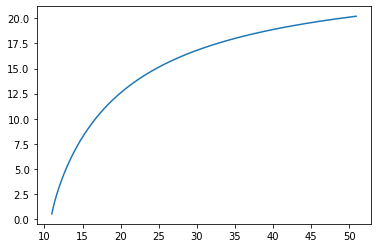

In [93]:
xx = np.arange(1000)/1000*40+r+0.1
plt.plot(xx, f(xx))
plt.show()